# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import BayesianEstimator, performance_stats, get_date_range, METRICS

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'

# Data

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded


In [5]:
df_prices = fund.df_prices
df_prices_fees = fund._get_prices_after_fee(df_prices, fee)

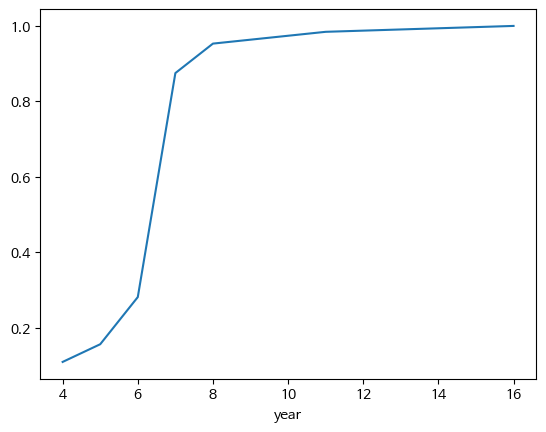

In [6]:
days_in_year = fund.days_in_year
df_year = get_date_range(df_prices).loc[:, 'n'].div(days_in_year).rename('year')
_ = df_year.groupby(df_year.round()).count().cumsum().div(df_year.count()).plot()

# Bayesian

## 1 Year Rate of Return

In [7]:
file_est = 'fund_ror_1y_241225v2'

### Split

In [8]:
y = 4
tickers = df_year.loc[df_year >= y].index.to_list()
len(tickers)

58

In [9]:
n = days_in_year
df_p = df_prices_fees[tickers]
df_train = df_p.iloc[:-n]
df_val = df_p.iloc[-n:]

### Estimate

In [10]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator(df_train, **kw)

In [11]:
be.bayesian_sample(freq='1y', file=file_est, path=path_data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, ror]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 955 seconds.


data/fund_ror_1y_241225v2.pkl saved


#### Load

In [10]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator.create(file_est, path_data, **kw)

data/fund_ror_1y_241225v2.pkl loaded


#### Visualize

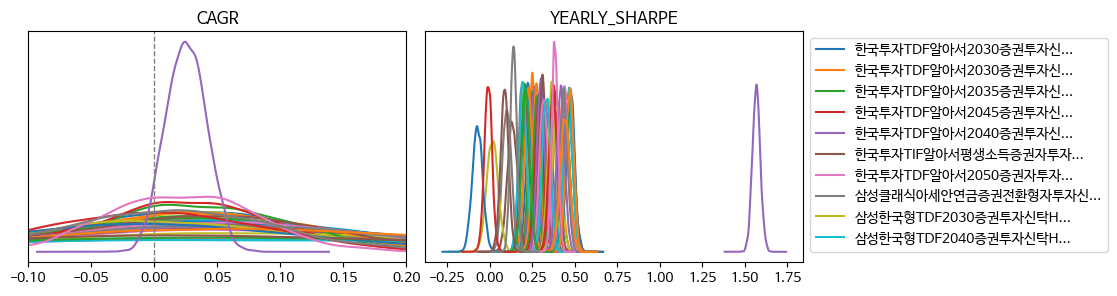

In [11]:
_ = be.plot_returns(xlim=(-0.1, 0.2), max_legend=10)

### Compare

In [24]:
n = 5

In [25]:
metrics = ['cagr', 'yearly_sharpe']
sort_by = metrics[0]
df = be.get_stats(metrics).T.sort_values(sort_by, ascending=False).iloc[:n]
t1 = df.index.to_list()

#fund.get_names(t1)
df

,start,end,cagr,yearly_sharpe
K55301BM7459,2017-03-31,2023-11-30,0.062756,0.382135
K55301BM7640,2017-03-31,2023-11-30,0.059319,0.384457
K55301BU5479,2017-08-31,2023-11-30,0.055628,0.373702
K55301BU6253,2017-08-31,2023-11-30,0.055309,0.380886
K55235BW6799,2017-09-29,2023-11-30,0.052623,0.284101


In [26]:
#var_name = 'ror'
var_name = 'cagr'

t2 = be.bayesian_summary(var_name).droplevel(0).sort_values('mean', ascending=False).iloc[:n].index.to_list()
#fund.get_names(t2)

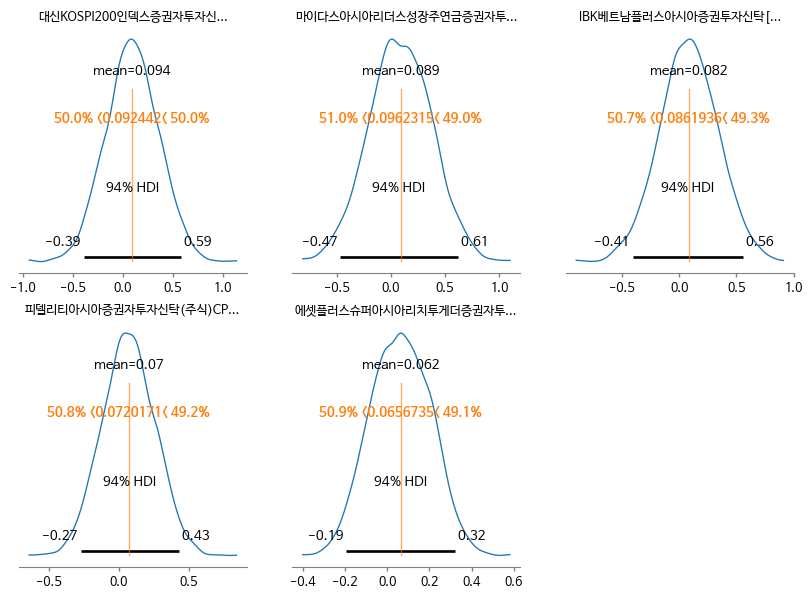

In [27]:
be.plot_posterior(var_name, t2, figsize=(10,7), textsize=9)

#### Validate

In [28]:
m = 'total_return'
func = lambda x: performance_stats(df_val[x]).loc[m].agg(['mean','std'])
func(t1).to_frame('by CAGR').join(func(t2).rename('by Bayesian'))

,by CAGR,by Bayesian
mean,0.189084,0.217427
std,0.024520,0.158973


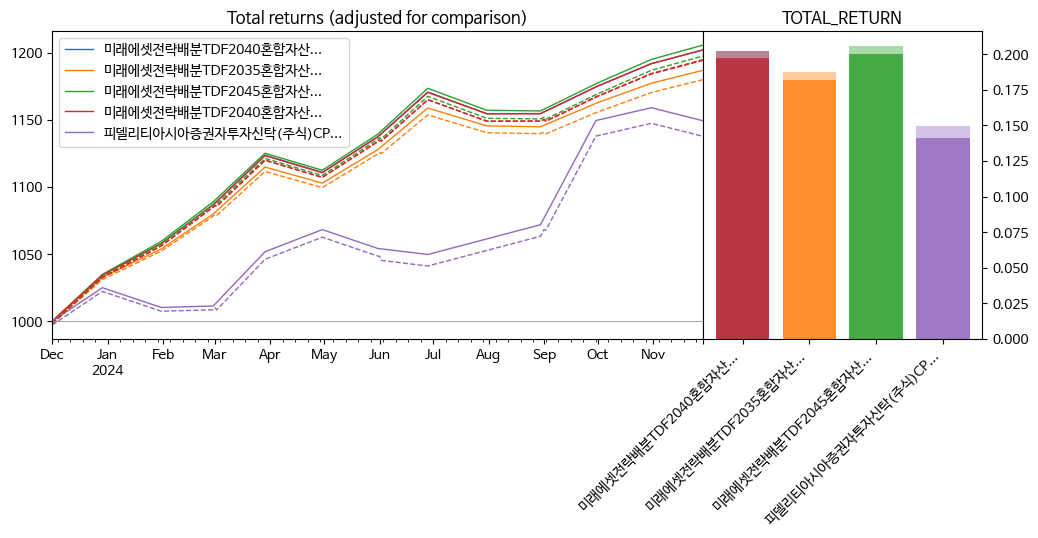

In [29]:
start = df_val.index.min()
fund.plot(t1, fee=fee, base=1000, metric=m, start_date=start)

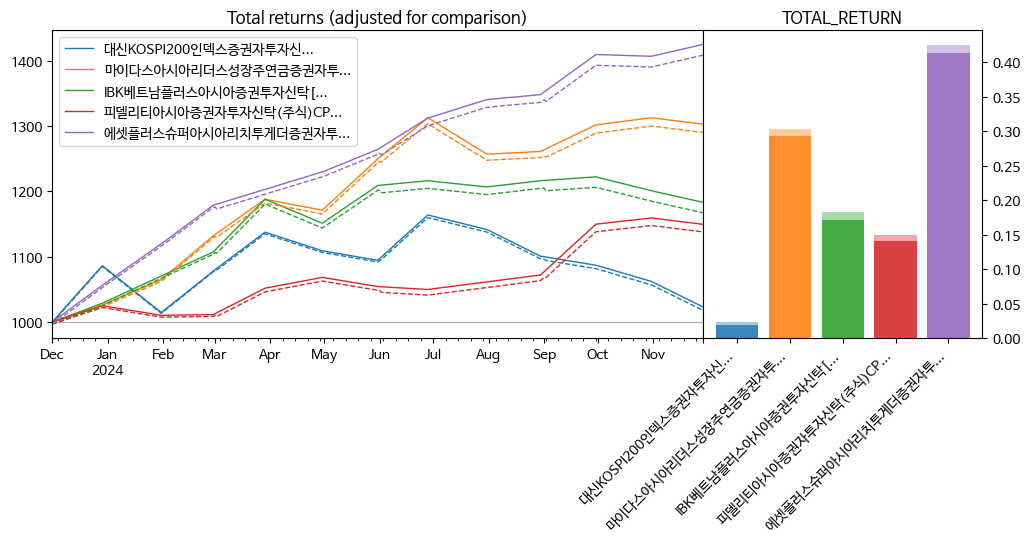

In [30]:
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)

## 3 Year Rate of Return

In [13]:
file_est = 'fund_ror_3y_241225v2'

### Split

In [14]:
y = 7
tickers = df_year.loc[df_year >= y].index.to_list()
len(tickers)

38

In [15]:
n = days_in_year * 3
df_p = df_prices_fees[tickers]
df_train = df_p.iloc[:-n]
df_val = df_p.iloc[-n:]

### Estimate

In [21]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator(df_train, **kw)

In [22]:
be.bayesian_sample(freq='3y', file=file_est, path=path_data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, ror]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 184 seconds.


data/fund_ror_3y_241225v2.pkl saved


#### Load

In [16]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator.create(file_est, path_data, **kw)

data/fund_ror_3y_241225v2.pkl loaded


#### Visualize

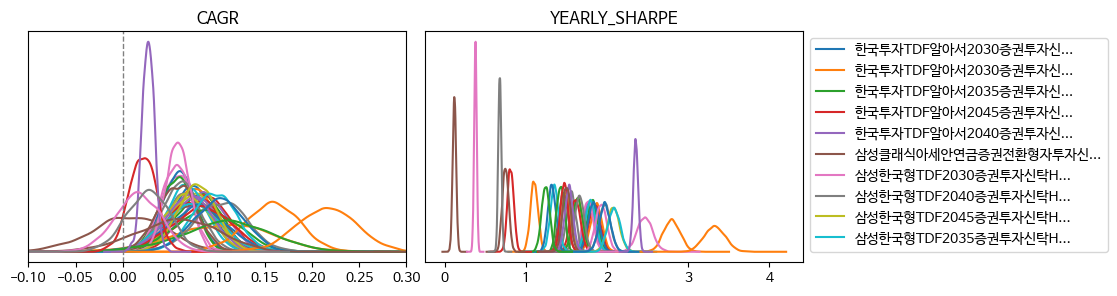

In [20]:
_ = be.plot_returns(xlim=(-0.1, 0.3), max_legend=10)

### Compare

In [12]:
n = 5

In [13]:
metrics = ['cagr', 'yearly_sharpe']
sort_by = metrics[0]
df = be.get_stats(metrics).T.sort_values(sort_by, ascending=False).iloc[:n]
t1 = df.index.to_list()

#fund.get_names(t1)
df

,start,end,cagr,yearly_sharpe
K55303BT4176,2017-11-30,2021-11-30,0.168659,0.698537
K55235BW6799,2017-09-29,2021-11-30,0.131873,0.70447
K55301BM7459,2017-03-31,2021-11-30,0.107828,0.74538
K55301BU5479,2017-08-31,2021-11-30,0.102728,0.732585
K55301BM7640,2017-03-31,2021-11-30,0.100791,0.743207


In [14]:
#var_name = 'ror'
var_name = 'cagr'

t2 = be.bayesian_summary(var_name).droplevel(0).sort_values('mean', ascending=False).iloc[:n].index.to_list()
#fund.get_names(t2)

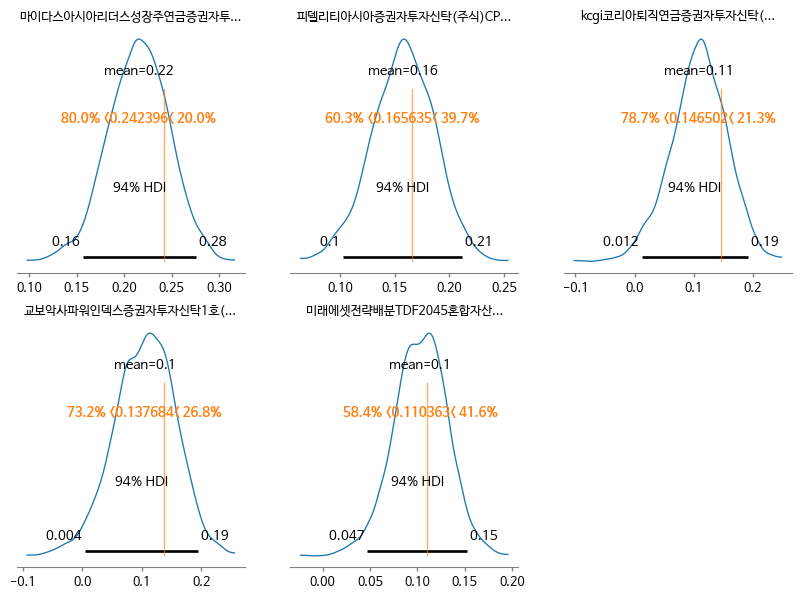

In [15]:
be.plot_posterior(var_name, t2, figsize=(10,7), textsize=9)

#### Validate

In [16]:
m = 'total_return'
func = lambda x: performance_stats(df_val[x]).loc[m].agg(['mean','std'])
func(t1).to_frame('by CAGR').join(func(t2).rename('by Bayesian'))

,by CAGR,by Bayesian
mean,0.048065,-0.004484
std,0.094500,0.081733


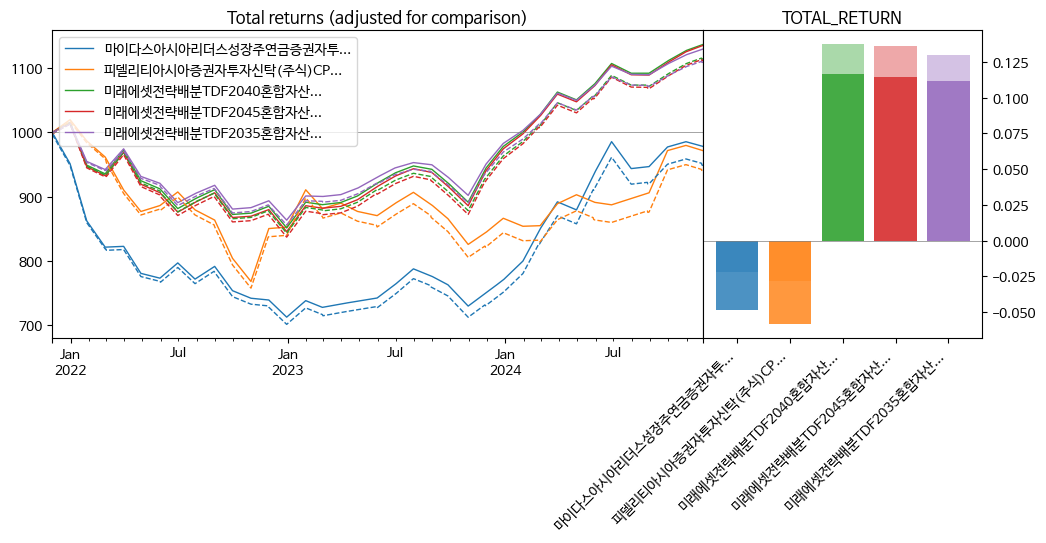

In [17]:
start = df_val.index.min()
fund.plot(t1, fee=fee, base=1000, metric=m, start_date=start)

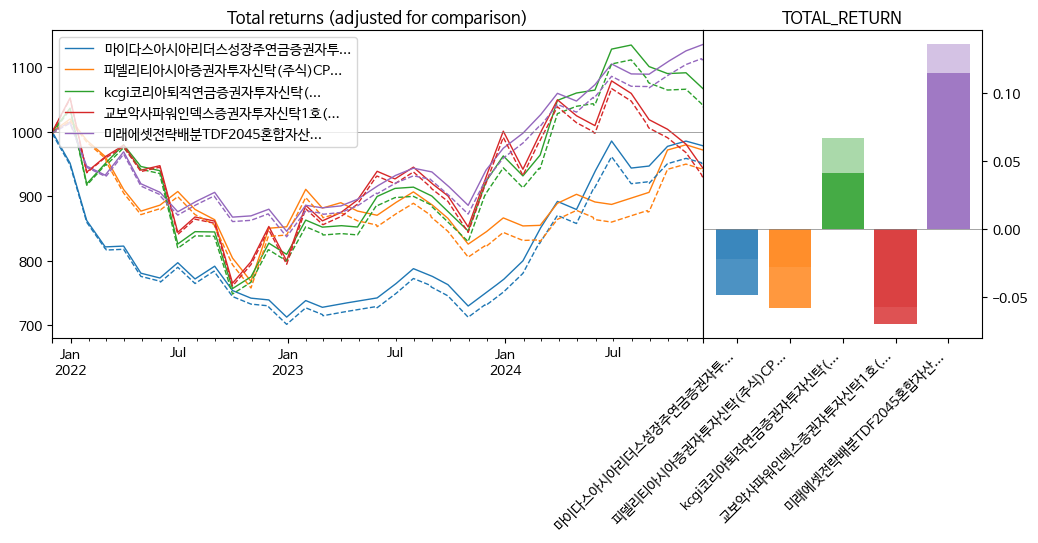

In [18]:
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)